In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import os
import cv2
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn import preprocessing
from imutils import paths
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/ColabNotebooks/ChestXray/train_images.zip

Archive:  /content/drive/MyDrive/ColabNotebooks/ChestXray/train_images.zip
   creating: train_images/0/
  inflating: train_images/0/00000011_000.png  
  inflating: train_images/0/00000039_004.png  
  inflating: train_images/0/00000041_006.png  
  inflating: train_images/0/00000056_001.png  
  inflating: train_images/0/00000061_011.png  
  inflating: train_images/0/00000071_002.png  
  inflating: train_images/0/00000071_007.png  
  inflating: train_images/0/00000074_000.png  
  inflating: train_images/0/00000076_000.png  
  inflating: train_images/0/00000084_000.png  
  inflating: train_images/0/00000090_003.png  
  inflating: train_images/0/00000090_008.png  
  inflating: train_images/0/00000091_009.png  
  inflating: train_images/0/00000099_002.png  
  inflating: train_images/0/00000099_003.png  
  inflating: train_images/0/00000099_008.png  
  inflating: train_images/0/00000099_009.png  
  inflating: train_images/0/00000099_012.png  
  inflating: train_images/0/00000116_001.png  
  i

In [ ]:
!unzip /content/drive/MyDrive/ColabNotebooks/ChestXray/test_images.zip

Archive:  /content/drive/MyDrive/ColabNotebooks/ChestXray/test_images.zip
  inflating: test_images/00000013_020.png  
  inflating: test_images/00000013_021.png  
  inflating: test_images/00000013_033.png  
  inflating: test_images/00000025_000.png  
  inflating: test_images/00000061_002.png  
  inflating: test_images/00000061_006.png  
  inflating: test_images/00000061_007.png  
  inflating: test_images/00000061_008.png  
  inflating: test_images/00000071_001.png  
  inflating: test_images/00000084_001.png  
  inflating: test_images/00000096_002.png  
  inflating: test_images/00000096_006.png  
  inflating: test_images/00000103_003.png  
  inflating: test_images/00000116_005.png  
  inflating: test_images/00000116_011.png  
  inflating: test_images/00000116_012.png  
  inflating: test_images/00000116_036.png  
  inflating: test_images/00000117_000.png  
  inflating: test_images/00000118_005.png  
  inflating: test_images/00000118_009.png  
  inflating: test_images/00000118_015.png  
  

In [ ]:
train_image_paths = list(paths.list_images("/content/train_images"))
print(len(train_image_paths))

4305


In [ ]:
test_image_paths = list(paths.list_images("/content/test_images"))
print(len(test_image_paths))

1844


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ChestXray/train_set.csv")
df.head()

,Image Index,Finding Labels,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000011_000.png,0,0,11,75,M,PA,2638,2449,0.143,0.143
1,00000013_011.png,1,11,13,60,M,AP,3056,2544,0.139,0.139
2,00000013_012.png,1,12,13,60,M,AP,3056,2544,0.139,0.139
3,00000013_013.png,1,13,13,60,M,AP,3056,2544,0.139,0.139
4,00000013_036.png,1,36,13,56,M,PA,2952,2968,0.143,0.143


In [ ]:
df['Patient Gender'].value_counts()

,count
Patient Gender,
M,2230
F,2075


In [ ]:
df['View Position'].value_counts()

,count
View Position,
PA,2543
AP,1762


In [ ]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Patient Gender' & 'View Position'.
df['Patient Gender']= label_encoder.fit_transform(df['Patient Gender'])
df['View Position']= label_encoder.fit_transform(df['View Position'])
df.head()

,Image Index,Finding Labels,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000011_000.png,0,0,11,75,1,1,2638,2449,0.143,0.143
1,00000013_011.png,1,11,13,60,1,0,3056,2544,0.139,0.139
2,00000013_012.png,1,12,13,60,1,0,3056,2544,0.139,0.139
3,00000013_013.png,1,13,13,60,1,0,3056,2544,0.139,0.139
4,00000013_036.png,1,36,13,56,1,1,2952,2968,0.143,0.143


In [ ]:
df['Patient Gender'].value_counts()

,count
Patient Gender,
1,2230
0,2075


In [ ]:
df['View Position'].value_counts()

,count
View Position,
1,2543
0,1762


In [ ]:
test_df1=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ChestXray/test_set.csv")
test_df1.head()

,Image Index,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_020.png,20,13,62,M,PA,2021,2021,0.194311,0.194311
1,00000013_021.png,21,13,62,M,PA,2021,2021,0.194311,0.194311
2,00000013_033.png,33,13,56,M,PA,2946,2991,0.143000,0.143000
3,00000025_000.png,0,25,71,M,PA,2048,2500,0.171000,0.171000
4,00000061_002.png,2,61,77,M,PA,2992,2991,0.143000,0.143000


In [ ]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Patient Gender' & 'View Position'.
test_df1['Patient Gender']= label_encoder.fit_transform(test_df1['Patient Gender'])
test_df1['View Position']= label_encoder.fit_transform(test_df1['View Position'])
test_df1.head()

,Image Index,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_020.png,20,13,62,1,1,2021,2021,0.194311,0.194311
1,00000013_021.png,21,13,62,1,1,2021,2021,0.194311,0.194311
2,00000013_033.png,33,13,56,1,1,2946,2991,0.143000,0.143000
3,00000025_000.png,0,25,71,1,1,2048,2500,0.171000,0.171000
4,00000061_002.png,2,61,77,1,1,2992,2991,0.143000,0.143000


In [ ]:
test_df2=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ChestXray/sample_submission.csv")
test_df2.head()

,Image Index,Finding Labels
0,00000013_020.png,0
1,00000013_021.png,1
2,00000013_033.png,1
3,00000025_000.png,1
4,00000061_002.png,1


In [ ]:
# Merge the two DataFrames based on the common column
test_df = pd.merge(test_df2,test_df1, on='Image Index', how='inner')
test_df.head()


,Image Index,Finding Labels,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_020.png,0,20,13,62,1,1,2021,2021,0.194311,0.194311
1,00000013_021.png,1,21,13,62,1,1,2021,2021,0.194311,0.194311
2,00000013_033.png,1,33,13,56,1,1,2946,2991,0.143000,0.143000
3,00000025_000.png,1,0,25,71,1,1,2048,2500,0.171000,0.171000
4,00000061_002.png,1,2,61,77,1,1,2992,2991,0.143000,0.143000


In [ ]:
train_imagepaths = {os.path.basename(x): x for x in train_image_paths}

for dirname, _, filenames in os.walk('/content/train_images/'):
    for filename in filenames:
        if filename.endswith('.png'):
            train_imagepaths[filename] = os.path.join(dirname, filename)

print(len(train_imagepaths))

4305


In [ ]:
# Create a new column with the full file paths
df['train_full_path'] = df['Image Index'].map(train_imagepaths)
df.head()

,Image Index,Finding Labels,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,train_full_path
0,00000011_000.png,0,0,11,75,1,1,2638,2449,0.143,0.143,/content/train_images/0/00000011_000.png
1,00000013_011.png,1,11,13,60,1,0,3056,2544,0.139,0.139,/content/train_images/1/00000013_011.png
2,00000013_012.png,1,12,13,60,1,0,3056,2544,0.139,0.139,/content/train_images/1/00000013_012.png
3,00000013_013.png,1,13,13,60,1,0,3056,2544,0.139,0.139,/content/train_images/1/00000013_013.png
4,00000013_036.png,1,36,13,56,1,1,2952,2968,0.143,0.143,/content/train_images/1/00000013_036.png


In [ ]:
test_imagepaths = {os.path.basename(x): x for x in test_image_paths}

for dirname, _, filenames in os.walk('/content/test_images/'):
    for filename in filenames:
        if filename.endswith('.png'):
            test_imagepaths[filename] = os.path.join(dirname, filename)

print(len(test_imagepaths))

1844


In [ ]:
test_df['test_full_path'] = test_df['Image Index'].map(test_imagepaths)
test_df.head()

,Image Index,Finding Labels,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,test_full_path
0,00000013_020.png,0,20,13,62,1,1,2021,2021,0.194311,0.194311,/content/test_images/00000013_020.png
1,00000013_021.png,1,21,13,62,1,1,2021,2021,0.194311,0.194311,/content/test_images/00000013_021.png
2,00000013_033.png,1,33,13,56,1,1,2946,2991,0.143000,0.143000,/content/test_images/00000013_033.png
3,00000025_000.png,1,0,25,71,1,1,2048,2500,0.171000,0.171000,/content/test_images/00000025_000.png
4,00000061_002.png,1,2,61,77,1,1,2992,2991,0.143000,0.143000,/content/test_images/00000061_002.png


In [ ]:
# Prepare image data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  #20% of data validation
)


In [ ]:
df['Finding Labels'] = df['Finding Labels'].astype(str)

# Create a data generator for training
print("Train")
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    x_col='train_full_path',
    y_col='Finding Labels',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    subset='training')

# Create a data generator for validation
print("Validation")
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    x_col='train_full_path',
    y_col='Finding Labels',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    subset='validation')

Train
Found 3444 validated image filenames belonging to 2 classes.
Validation
Found 861 validated image filenames belonging to 2 classes.


In [ ]:
# Define the model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 1), padding='same', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), padding='same', activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())

# Output Layer for Binary Classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 63, 63, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 6,738,233 (25.70 MB)

 Trainable params: 6,736,625 (25.70 MB)

 Non-trainable params: 1,608 (6.28 KB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_efficientnet_model.keras', save_best_only=True, monitor='val_loss')

In [ ]:
 hist = model.fit(train_generator, epochs=50, validation_data=validation_generator,callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 629s 6s/step - accuracy: 0.5834 - loss: 0.7904 - val_accuracy: 0.6179 - val_loss: 1.0581
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 612s 6s/step - accuracy: 0.6800 - loss: 0.6111 - val_accuracy: 0.5784 - val_loss: 0.6875
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 616s 6s/step - accuracy: 0.6615 - loss: 0.6179 - val_accuracy: 0.3821 - val_loss: 1.1456
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 627s 6s/step - accuracy: 0.6760 - loss: 0.5926 - val_accuracy: 0.6167 - val_loss: 0.7350
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 610s 6s/step - accuracy: 0.6698 - loss: 0.6015 - val_accuracy: 0.5830 - val_loss: 0.7145
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 607s 6s/step - accuracy: 0.7125 - loss: 0.5674 - val_accuracy: 0.6353 - val_loss: 0.6652
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 605s 6s/step - accuracy: 0.6914 - loss: 0.5900 - val_accuracy: 0.3786 - val_loss: 1.2479
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 594s 5s/step - accuracy: 0.7033 - loss: 0.5699 - val_accu

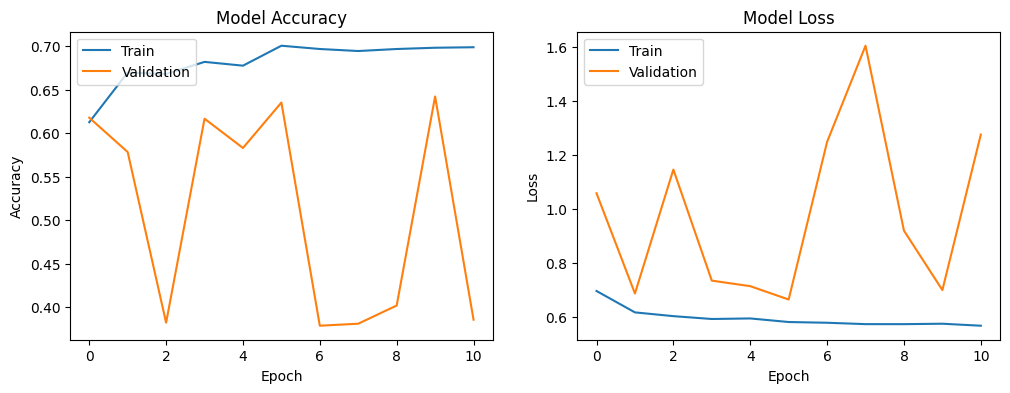

In [ ]:
plt.figure(figsize=(12, 4))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

['00007804_001.png', '00005252_001.png', '00014525_012.png', '00025974_001.png']
['0', '1', '1', '0']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


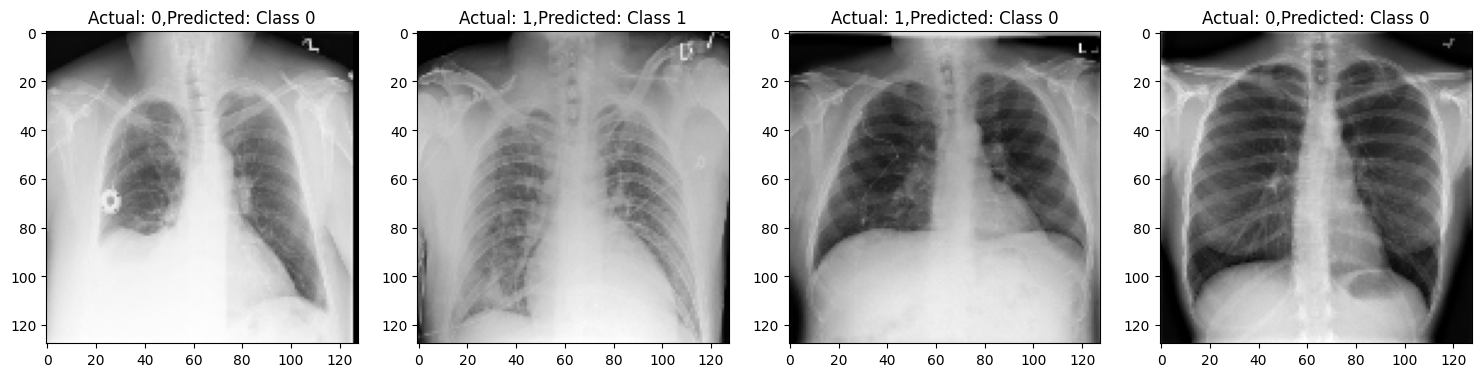

In [ ]:
directory_path = '/content/test_images/'

image_files = os.listdir(directory_path)[:4]
print(image_files)

actual_value=[]
for i in image_files:
  value = test_df.loc[test_df['Image Index'] == i, 'Finding Labels'].values
  actual_value.append(value[0])
print(actual_value)

fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))

for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory_path, image_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_array = img.astype(np.float32) / 255.0
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    actual_prediction = (predictions > 0.5).astype(int)
    axs[i].imshow(img, cmap='gray')

    predicted_label = 'Class 0' if actual_prediction[0][0] == 0 else 'Class 1'
    axs[i].set_title(f'Actual: {actual_value[i]},Predicted: {predicted_label}')

plt.tight_layout()
plt.show()